# Ford GoBike System Data Analysis

## Investigation Overview

Investigation Overview
In this investigation, we will investigate the trip information of Ford GoBike System. We will visualize the most common trip duration and uses information. We will also take a look at different trends

## Dataset Overview

This data consisted of Ford GoBike System of year 2018. Ford GoBike is a bicycle sharing system in the San Francisco Bay Area. 
There are 111382 trips information in this dataset
The features in the dataset include trip duration (second), trip start and end time, trip start and end location, user type, user birth year and user gender, etc. 
During the data wrangling process, some unneeded variables were removed and some new variables are created to help investigate the dataset effectively.

In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import seaborn as sb

In [2]:
#Reading files
df=pd.read_csv('201803-fordgobike-tripdata.csv')
df['member_age']=2019-df['member_birth_year']
df=df.query('member_age <= 63')
df.drop(['member_birth_year'], axis=1, inplace=True)
df=df.query('duration_sec <8000')
df['duration_min'] = df['duration_sec'] / 60.0
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
#Now plotting the count of trips by the days of week
df['Day_of_week']=df['start_time'].dt.dayofweek

## Trip count by User type
It is clearly observed that Customers have taken very less trips and Subscribers have taken more trips then customers

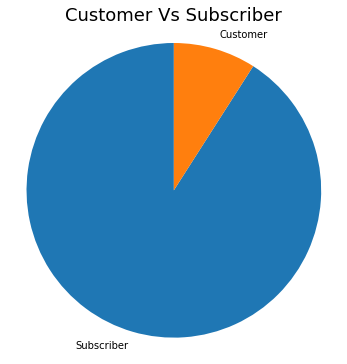

In [3]:
#plotting the most no of user weather customer or subcriber
plt.figure(figsize=(7,6))
sorted_count=df['user_type'].value_counts()
plt.pie(sorted_count,labels=sorted_count.index,startangle=90)
plt.axis('square',counterclock=False,wedgeprops={'width':0.4});
plt.title('Customer Vs Subscriber',fontsize=18);

## Trip Duration vs User Type
Yes, Subscribers and Customers do have different ride behaviors. The Subscribers’ trip duration is generally less than Customers’ trip duration. The Subscribers trip duration is an obvious unimodal distribution. The Customers trip duration, however, is more like a uniform distribution. 

I would assume that Subscribers use the bike for short distance commute; customers use the bike for commute, fun, leisure, all different kinds of purpose.

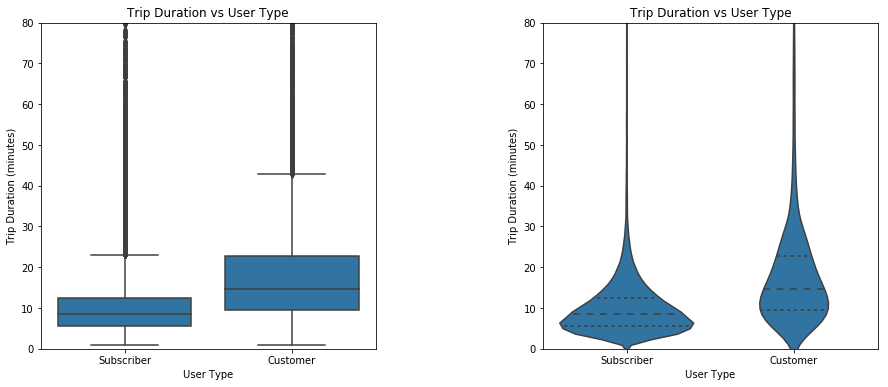

In [4]:
#plotting a violinplot on Subscriber Vs Customer
default_color=sb.color_palette()[0]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sb.boxplot(data=df,x='user_type',y='duration_min',color=default_color);
plt.ylim([0,80])
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs User Type');

plt.title('Trip Duration vs User Type');
plt.subplot(1,2,2)
sb.violinplot(data=df, x='user_type', y='duration_min', color=default_color, inner='quartile');
plt.ylim([0,80])
plt.subplots_adjust(wspace=0.5);
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs User Type');

## Trip counts by Members Gender
Most of the trips are from Males. Would the Males,Females have different ride behaviors? This deserves a deeper look

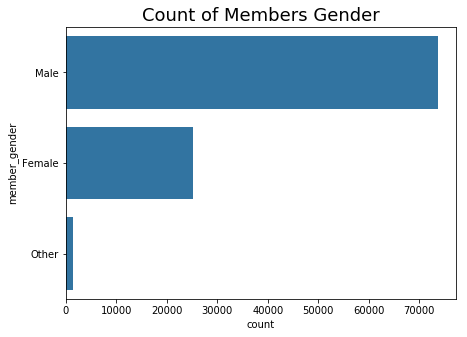

In [5]:
#plotting the graph of member ggender
plt.figure(figsize=(7,5))
order=df['member_gender'].value_counts().index
base_color=sb.color_palette()[0]
sb.countplot(data=df,y='member_gender',color=base_color,order=order);
plt.title('Count of Members Gender',fontsize=18);

### Who has taken the more long trips according to Gender?
It is observed that Females have taken more long long rides then others.

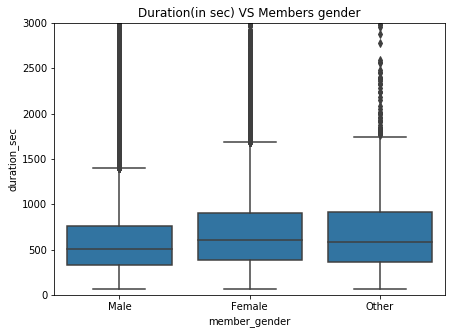

In [6]:
#Plotting  member_gender and duration_sec.
plt.figure(figsize=(7,5))
base_color=sb.color_palette()[0]
sb.boxplot(data=df,x='member_gender',y='duration_sec',color=base_color)
plt.ylim(0,3000)
plt.title('Duration(in sec) VS Members gender');

## Count of Bike Share for the trips


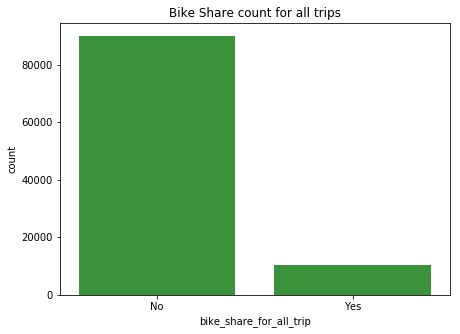

In [13]:
#checking and plotting the bike_share_for_all_trip 
plt.figure(figsize=(7,5))
order=df['bike_share_for_all_trip'].value_counts().index
base_color=sb.color_palette()[2]
sb.countplot(data=df,x='bike_share_for_all_trip',color=base_color,order=order);
plt.title('Bike Share count for all trips');